<a href="https://colab.research.google.com/github/Divya-Dhananjayan/IPSR-internship/blob/main/Task2internship_EDA_Visualization_partB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.Institutions with fastest improvement/decline in ranks
======================

Here i am considering score instead of rank. As we are calculating the improvement or decline of each institute individually it is important to compare their performance with their previous year. Rank in a year depends on other institutes performances . So it is better to take score rather than rank

My idea is to extract required column from merged data, then arrange the columns to display scores of each institute year wise according to category

/tmp/ipython-input-2791614490.py:68: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Top_improving_institutes = final_df_negative_sorted[final_df_positive_sorted['positive_diff_count']>6]


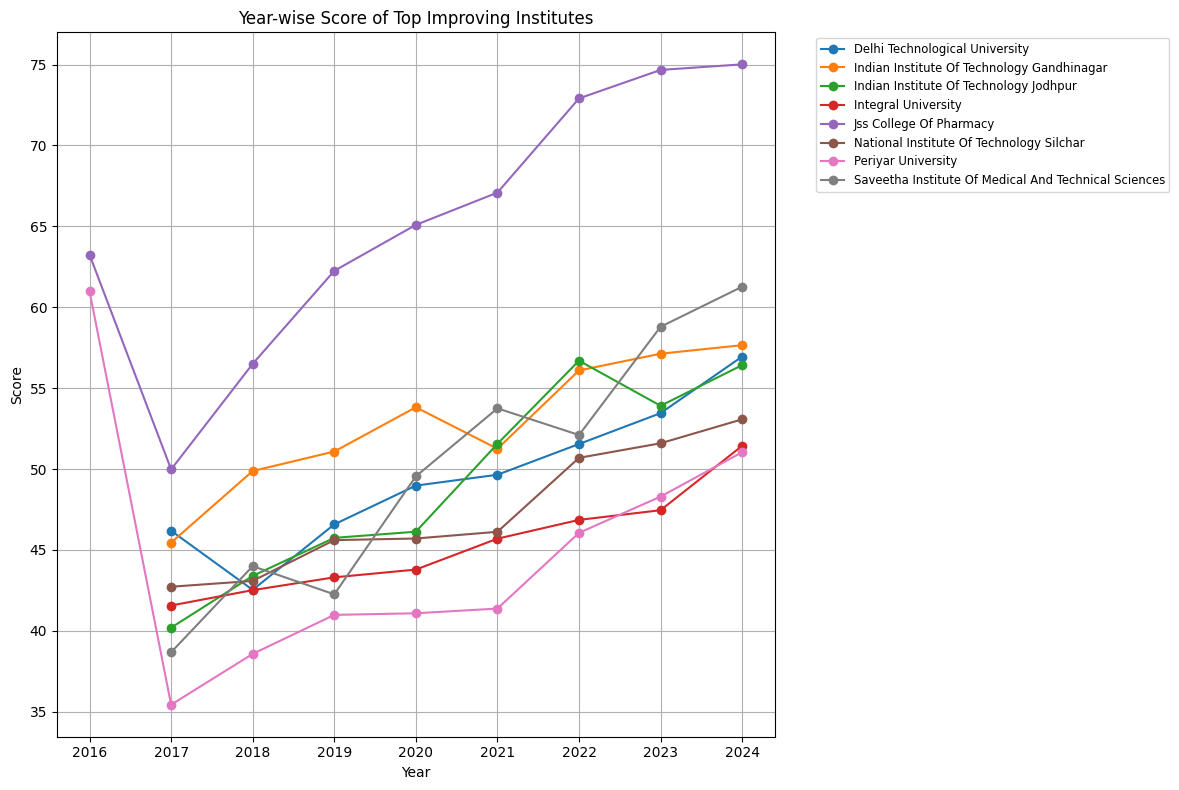

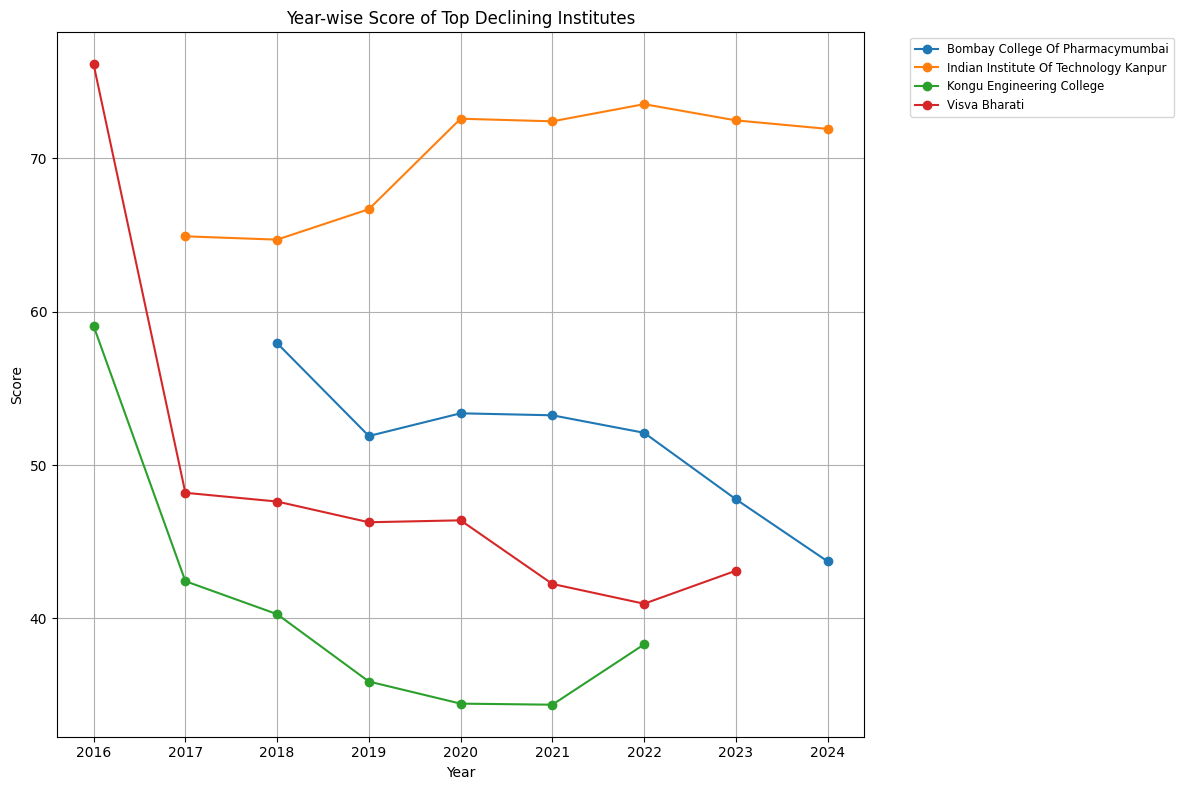

In [ ]:

# Loading required columns only
score_data = viz_data[['institute_name', 'score', 'ranking_year', 'ranking_category']].drop_duplicates()

''' we need to analyse the scores year wise. Now in our table its data  is in
  multiple rows . we need it in columns . so that comparing the scores each year
  become eazy '''

#So ranking year column is pivotted
score_table = score_data.pivot_table(index=['institute_name', 'ranking_category'],
                                     columns='ranking_year',
                                     values='score')

# reset the indices to convert to column names to access data
score_table = score_table.reset_index()

year_columns = [col for col in score_table.columns if isinstance(col, int)]
year_columns.sort()

# extracting unique category
categories = score_data['ranking_category'].unique()

# For storing data after completing each loop
score_diff_table = []

# loop created to consider each category separately
for category in categories:

  # we dont have data in few categories. so not considering them
    if category in ('Innovation', 'Open University', 'Skill University'):
        continue

    # Filter by category
    cat_df = score_table[score_table['ranking_category'] == category].copy()

    # loop created to find score difference.First year(2016) is not needed
    for j in range(1, len(year_columns)):
        prev_year = year_columns[j - 1]
        curr_year = year_columns[j]

        # Calculating score difference betwwen adjacent years
        cat_df[f'diff_{prev_year}_{curr_year}'] = cat_df[curr_year] - cat_df[prev_year]

    # Saving data simultaneously
        score_diff_table.append(cat_df)

# combining the data to a single dataframe
final_df = pd.concat(score_diff_table, ignore_index=True)

# saving score difference table for future use
final_df.to_csv('score_diff_table.csv')


#separating columns having score difference
diff_columns = [col for col in final_df.columns if str(col).startswith('diff_')]


#counting how many times each institute shown positive growth from the previous year
final_df['positive_diff_count'] = (final_df[diff_columns] > 0).sum(axis=1)
#counting how many times each institute shown score decline from the previous year
final_df['negative_diff_count'] = (final_df[diff_columns] < 0).sum(axis=1)

# checking maximum counts by sorting
final_df_positive_sorted = final_df.sort_values(by='positive_diff_count', ascending=False)
final_df_negative_sorted = final_df.sort_values(by='negative_diff_count',ascending = False)


#the maximum count is 7 for growth and 5 for decline. Filtering those institutes
Top_improving_institutes = final_df_negative_sorted[final_df_positive_sorted['positive_diff_count']>6]
Top_declining_institutes =  final_df_negative_sorted[final_df_negative_sorted['negative_diff_count']>4]

#unique name taken
Top_institute_names = Top_improving_institutes['institute_name'].unique()
Weak_institute_names = Top_declining_institutes['institute_name'].unique()


# Filtering score data for only top improving institutes
filtered_data_top = score_data[score_data['institute_name'].isin(Top_institute_names)]


# planning to plot graphs year wise. so years in the ranking year column converted to separate columns having score as entries

pivot_df = filtered_data_top.pivot_table(index='institute_name', columns='ranking_year', values='score')

# Line graph plotted for top performing institutes
plt.figure(figsize=(12, 8))

#trying to plot without resetting index
for institute in pivot_df.index:
    plt.plot(pivot_df.columns, pivot_df.loc[institute], marker='o', label=institute)

plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Year-wise Score of Top Improving Institutes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

# Line graph plotted for top declining institutes
filtered_data_weak = score_data[score_data['institute_name'].isin(Weak_institute_names)]
plt.figure(figsize=(12, 8))
pivot_df = filtered_data_weak.pivot_table(index='institute_name', columns='ranking_year', values='score')



for institute in pivot_df.index:
    plt.plot(pivot_df.columns, pivot_df.loc[institute], marker='o', label=institute)

plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Year-wise Score of Top Declining Institutes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid()
plt.tight_layout()
plt.show()

3.Category-wise score comparison (e.g., Engineering vs Management)
=================================

In [ ]:
 # loading the merged dataset
df = pd.read_csv('/content/3dfs_merged.csv')

# we need only category , year and score in this session.
#So assigned it to a new dataframe
df = df[['ranking_category','ranking_year','score']]

#dataframe is sorted according to category in ascending and score descending
df = df.sort_values(by=['ranking_category','score'] , ascending=[True,False])


# Extracted the no of categories for looping
categories = df['ranking_category'].unique()

# Extracted the no of years for looping
years = df['ranking_year'].unique()

# An empty list created for future use
results = []



''' my aim is to get a table having ranking year, ranking category minimum
and maximum scores of that prticular year'''

# select one category at a time and extract details for  entire years.
# same procedure continues for next category and so on.
for category in categories:
  for yr in years:

# data frame created to store min and max scores of particular category and year
     subset = df[
      (df['ranking_category'] == category)
      &
      (df['ranking_year'] == yr)
  ]

  # max and min score of selected category during selected year is stored
     max_score=  subset.max()
     min_score = subset.min()


# After each loop the data should be stored continuosly to a list
# as the data is growing vertically append is used

     results.append({
                'ranking_category': category,
                'ranking_year': yr,
                'max_score': max_score['score'],
                'min_score': min_score['score']

            })

#list converted to dataframe for further calculations
min_max_table = pd.DataFrame(results)

#To check the data
print(min_max_table  )

                   ranking_category  ranking_year  max_score  min_score
0    Agriculture and Allied Sectors          2024      87.98      44.05
1    Agriculture and Allied Sectors          2023      83.16      42.10
2    Agriculture and Allied Sectors          2022        NaN        NaN
3    Agriculture and Allied Sectors          2021        NaN        NaN
4    Agriculture and Allied Sectors          2019        NaN        NaN
..                              ...           ...        ...        ...
157                      University          2019      82.28      38.45
158                      University          2020      84.18      39.71
159                      University          2018      82.16      37.47
160                      University          2017      83.28      32.99
161                      University          2016      91.81      47.05

[162 rows x 4 columns]


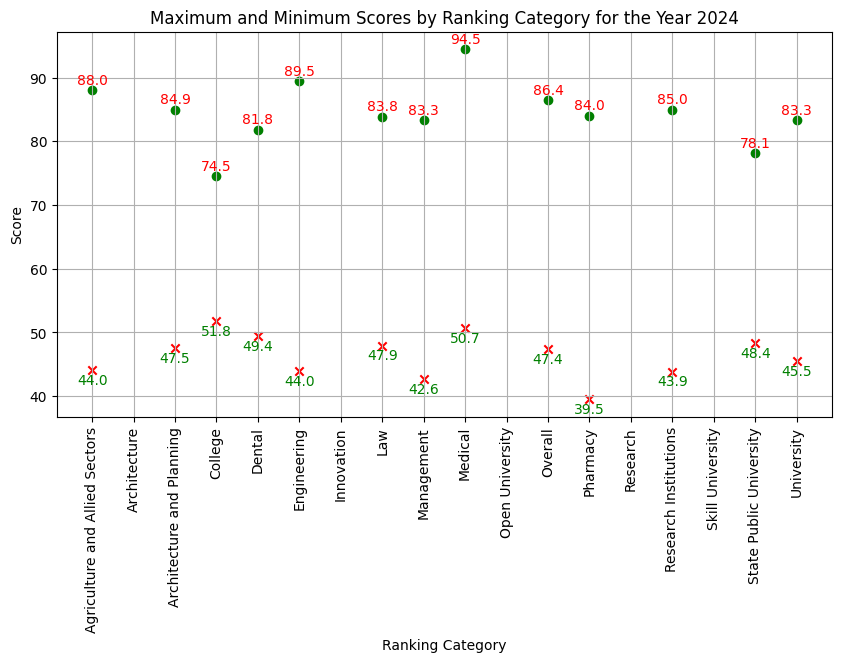

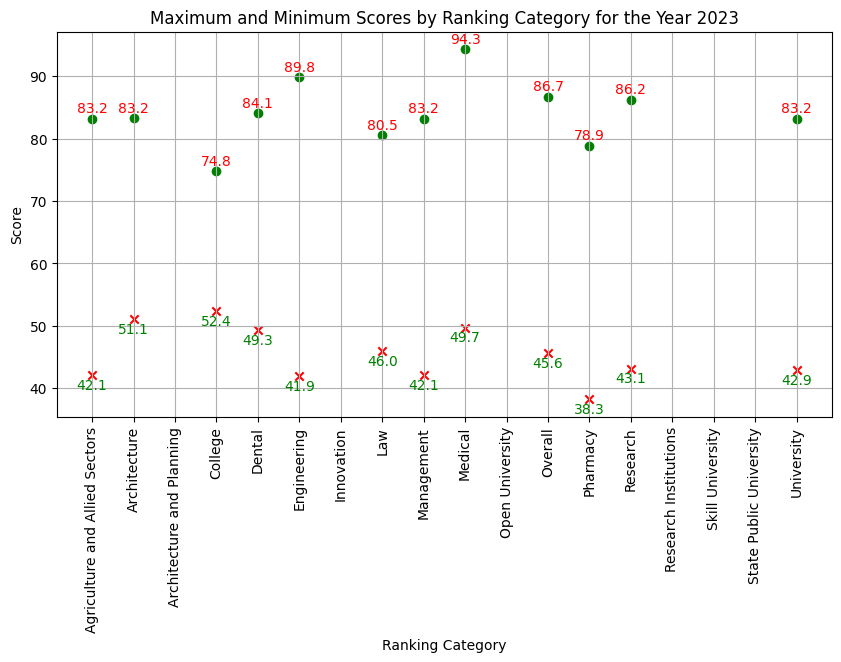

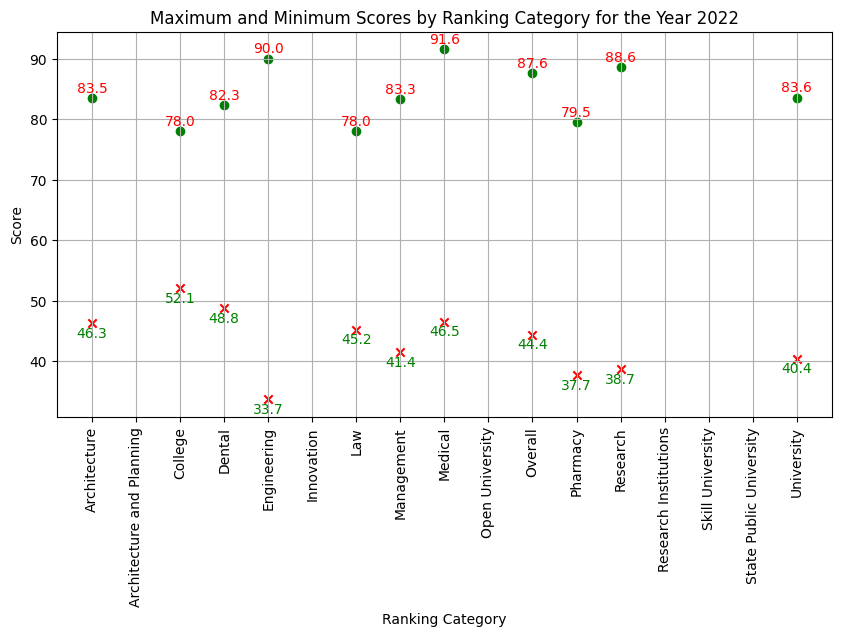

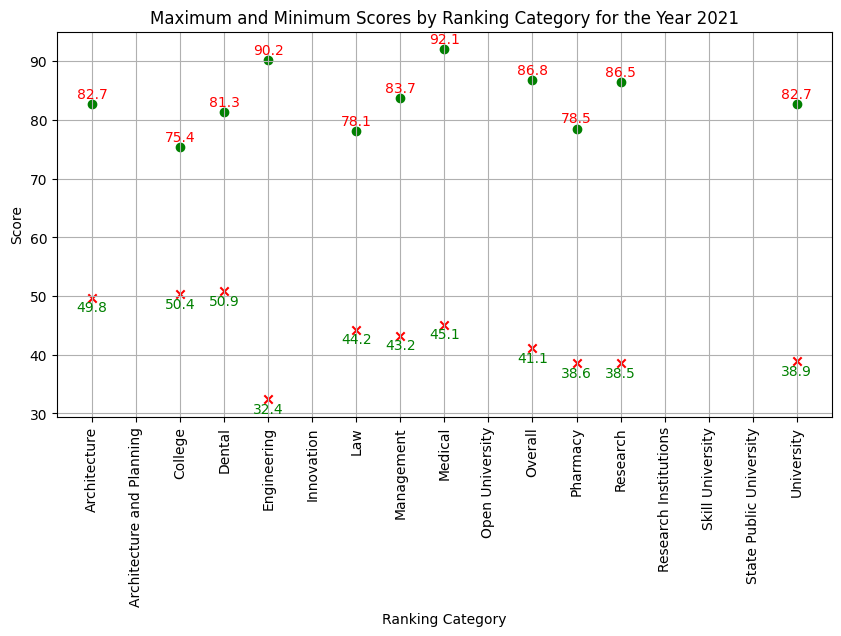

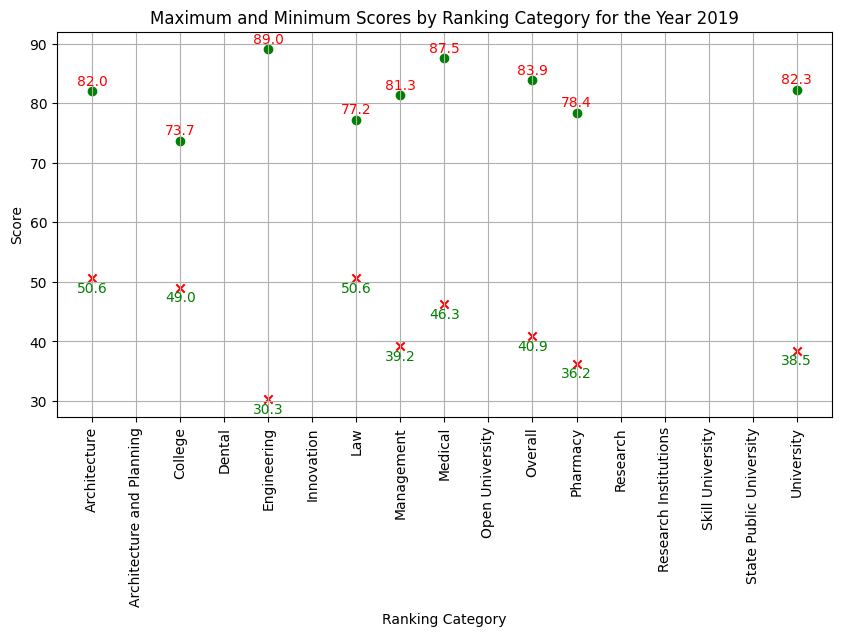

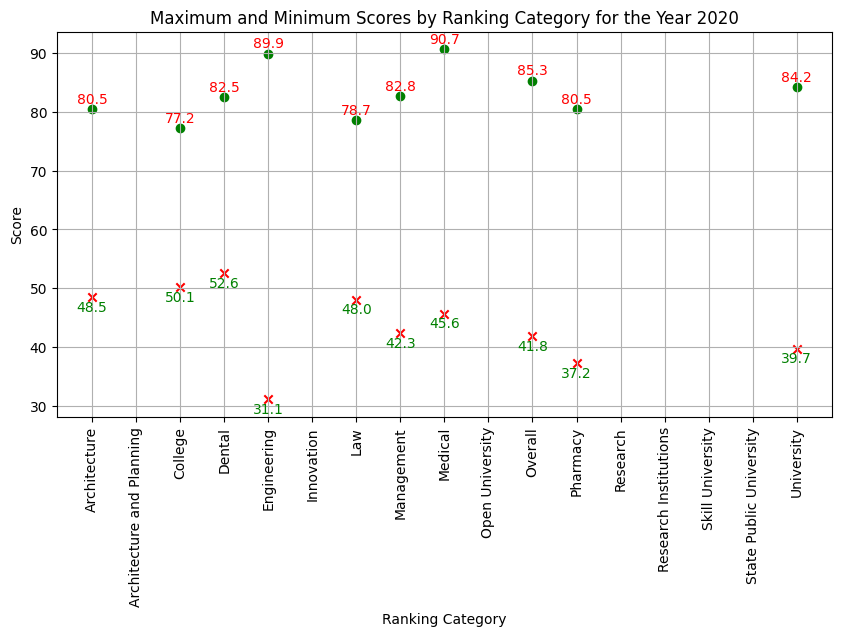

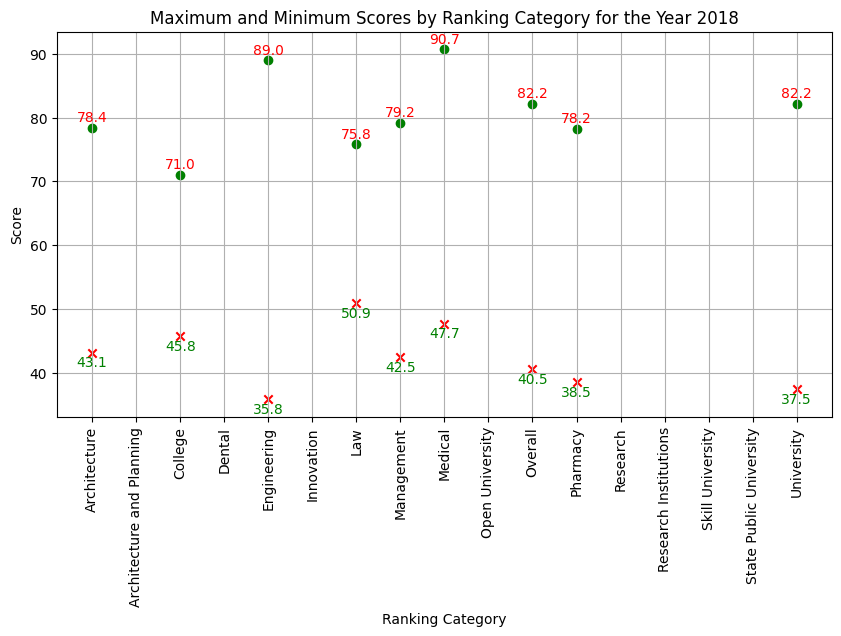

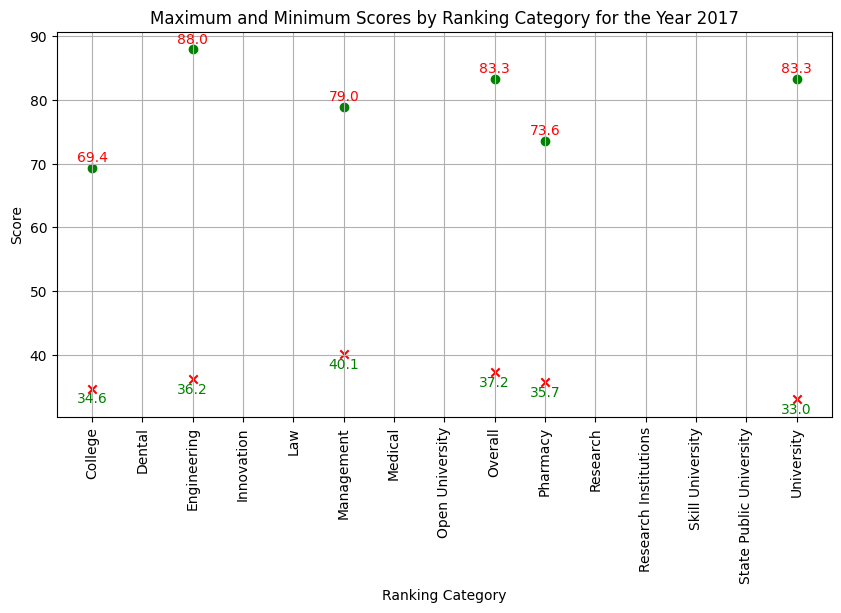

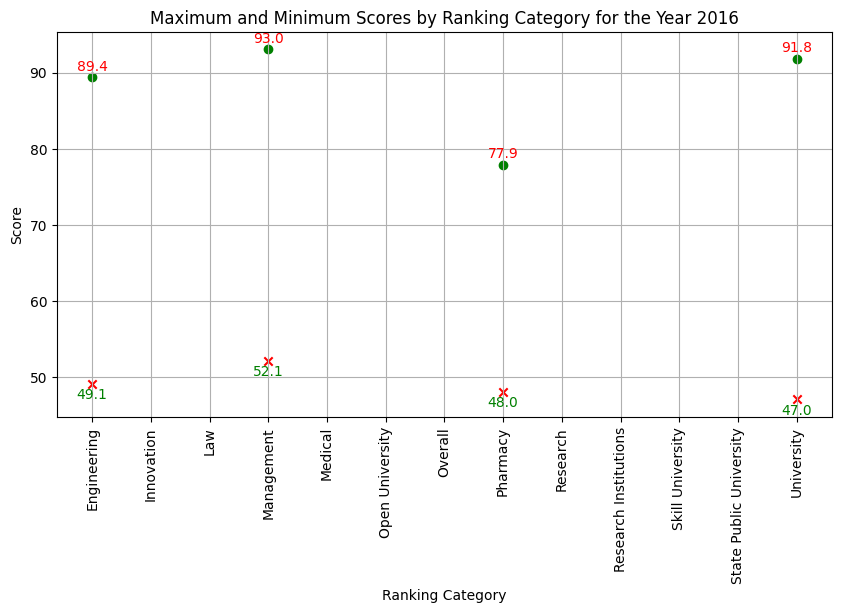

' Here we can see null values because in the early years they had only a few\nranking categories. Also in the latest years they introduced some new\n rankingcategories. Considering all these the data is not incomplete,\n it is perfect'

In [ ]:
'''  I am planning to plot  scatter plots for each year having all categories
labelling their maximum and minimum score. That means we get the score for 1st
and 100th ranks in that particular year for all categories. Thus we can compare
sore for each category even their ranks are same'''


# unique year is extracted for plotting each year

year = min_max_table['ranking_year'].unique()

# loop created for every year

for yr in year:
  # new data frame created for using repeatedly.follows yearwise rotation
  df_year = min_max_table[min_max_table['ranking_year']== yr]

  # x axis entries should be ranking category
  x = df_year['ranking_category']

  # max and min score of selected category during selected year is stored

  y_max = df_year['max_score']
  y_min = df_year['min_score']

  # chart area required is 10x5
  plt.figure(figsize=(10, 5))


# scatter plot having green color for max score marker needed is default circle
  plt.scatter(x, y_max, color='green', label='Max Score')


# for making the visible in the chart
# loop created to label max score running entire times of categories present.
# position adjusted to make it more clear and decimal point corrected to 1
  for i in range(len(x)):
      plt.text(i, y_max.iloc[i] + 0.5, f"{y_max.iloc[i]:.1f}", ha='center', va='bottom', color='red')

# min scores labelled as red crosses
  plt.scatter(x, y_min, color='red', marker='x', label='Min Score')
  for i in range(len(x)):
    plt.text(i, y_min.iloc[i] - 0.5, f"{y_min.iloc[i]:.1f}", ha='center', va='top', color='green')

# x axis entries position adjusted as vertical for better readability
  plt.xticks(rotation=90)

# Labelling what is in x and y axis
  plt.xlabel('Ranking Category')
  plt.ylabel('Score')

# Heading for each chart
  plt.title(f'Maximum and Minimum Scores by Ranking Category for the Year {yr}')

# grid on
  plt.grid(True)

  plt.show()


''' Here we can see null values because in the early years they had only a few
ranking categories. Also in the latest years they introduced some new
 rankingcategories. Considering all these the data is not incomplete,
 it is perfect'''


4.Ph.D. student strength vs Total Score (possible correlation)
==========================

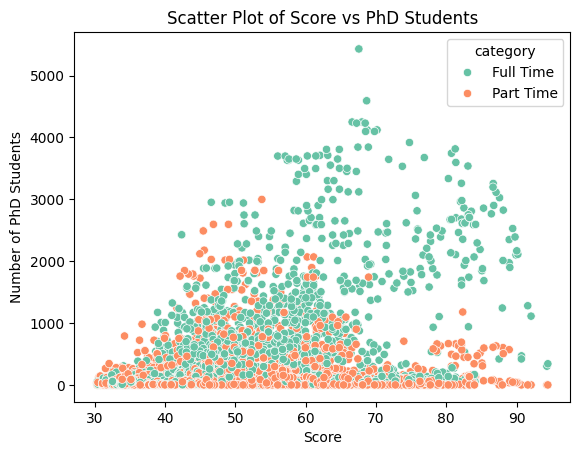

In [ ]:
import seaborn as sns

#loading required data
df = df_merged_df1df2df3

#Extracting required column
df = df[['ranking_category','ranking_year','institute_name','score' ,'no. of phd students','category']]

''' i am planning to plot 2 graphs . one with out adding part time and full time students,
another one by aggregating both the categories.'''

# number of phd students from both the categories is added up
phd_summary = df.groupby(['ranking_category', 'ranking_year', 'institute_name','score'])['no. of phd students'].sum().reset_index()

# Scatter plot is better
# For better presentation seaborn is used
# scatter plot having score on x axis and no. of students in y axis
sns.scatterplot(data = df, x = 'score',y = 'no. of phd students',palette='Set2',hue = 'category')

# labelling each axis
plt.ylabel("Number of PhD Students")
plt.xlabel("Score")
plt.title("Scatter Plot of Score vs PhD Students")
plt.show()

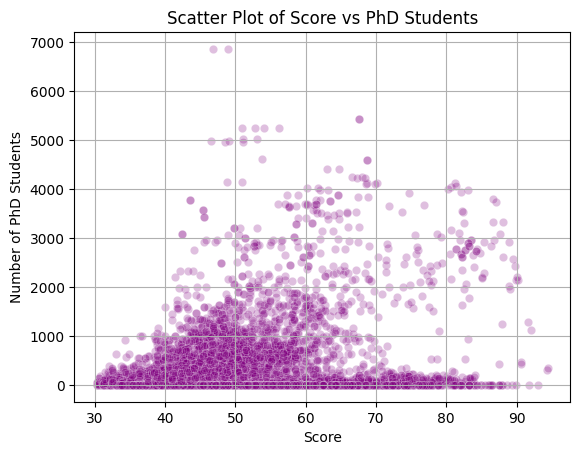

In [ ]:

# plotting another graph having combined number of both part time and full time students
sns.scatterplot(data=phd_summary, x='score', y='no. of phd students', color='purple', alpha=0.25)
plt.ylabel("Number of PhD Students")
plt.xlabel("Score")
plt.title("Scatter Plot of Score vs PhD Students")
plt.grid()
plt.show()

In [ ]:
phd_summary

,ranking_category,ranking_year,institute_name,score,no. of phd students
0,Agriculture and Allied Sectors,2023,Acharya N G Ranga Agricultural Universityguntur,48.57,0.0
1,Agriculture and Allied Sectors,2023,Acharya Narendra Deva University Of Agricultur...,43.13,174.0
2,Agriculture and Allied Sectors,2023,Anand Agricultural University,51.13,152.0
3,Agriculture and Allied Sectors,2023,Annamalai University,47.46,279.0
4,Agriculture and Allied Sectors,2023,Assam Agricultural University Jorhat,50.35,303.0
...,...,...,...,...,...
6308,University,2024,Vel Tech Rangarajan Dr Sagunthala R And D Inst...,46.22,511.0
6309,University,2024,Vellore Institute Of Technology,64.79,4411.0
6310,University,2024,Vignans Foundation For Science Technology And ...,48.45,660.0
6311,University,2024,Visvesvaraya Technological University,48.10,281.0


5.Outlier institutions (e.g., high score but low Ph.D. count)
=================


In [ ]:



## loading required data
df = df_merged_df1df2df3

# Extracting required columns
df = df[['ranking_category', 'ranking_year', 'institute_name', 'score', 'no. of phd students']]

# Summing number of PhD students from both categories
phd_summary = df.groupby(['ranking_category', 'ranking_year', 'institute_name', 'score'])['no. of phd students'].sum().reset_index()

# Get unique ranking categories
categories = phd_summary['ranking_category'].unique()

#phd_summary['ranking_year'].astype(int)

# unique years extracted
years = sorted(phd_summary['ranking_year'].unique())


# for storing the data after completing each loop
result = []

neglected_ranking_categories = ['Research','Innovation','Architecture and Planning','Research Institutions','Skill University']

# we need the data separately for each category
for category in categories:
  if category in neglected_ranking_categories:
    continue
  #in our merged data we dont have the details of phd students in the years 2016 & 2017
  # so neglect those years. counting should start from 2018 onwards only
  for yr in years[2:]:
    # taking data for the selected category and year
    cat_df = phd_summary[(phd_summary['ranking_category'] == category) &
            (phd_summary['ranking_year'] == yr)]

    # filtering bars assigned. we need high score level so percentile above 90 is extracted
    score_threshold = cat_df['score'].quantile(0.90)

    # filtering bars assigned. we need low no of phd students level so percentile below 25 is extracted
    phd_threshold = cat_df['no. of phd students'].quantile(0.25)



   # Now the condition is applied and stored
    outliers = cat_df[(cat_df['score'] >=score_threshold) &
                  (cat_df['no. of phd students']<=phd_threshold)]

   # after each loop the filtered data is stored.
    result.append(outliers)

# all the data frames stored in the 'result' is combined to one dataframe
outlier_df = pd.concat(result, ignore_index=True)


# saving this can be used later for further analysis
outlier_df.to_csv('outliers.csv')

outlier_df



,ranking_category,ranking_year,institute_name,score,no. of phd students
0,Architecture,2021,Indian Institute Of Technology Kharagpur,76.14,0.0
1,Architecture,2021,Indian Institute Of Technology Roorkee,82.65,0.0
2,Architecture,2021,National Institute Of Technology Calicut,76.50,0.0
3,Architecture,2022,Indian Institute Of Technology Kharagpur,75.42,0.0
4,Architecture,2022,Indian Institute Of Technology Roorkee,83.46,0.0
...,...,...,...,...,...
100,Pharmacy,2022,Jss College Of Pharmacy,74.60,0.0
101,Pharmacy,2023,Jss College Of Pharmacy,76.55,0.0
102,Pharmacy,2024,Jss College Of Pharmacy,77.13,0.0
103,University,2022,Jamia Millia Islamianew Delhi,65.91,0.0


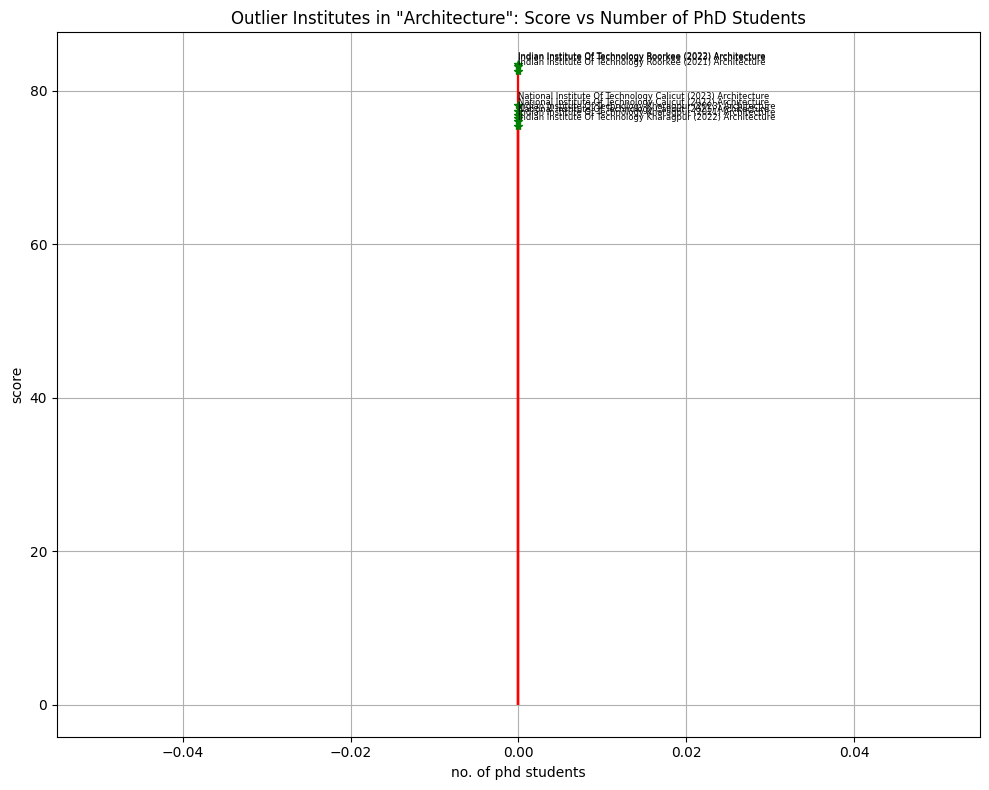

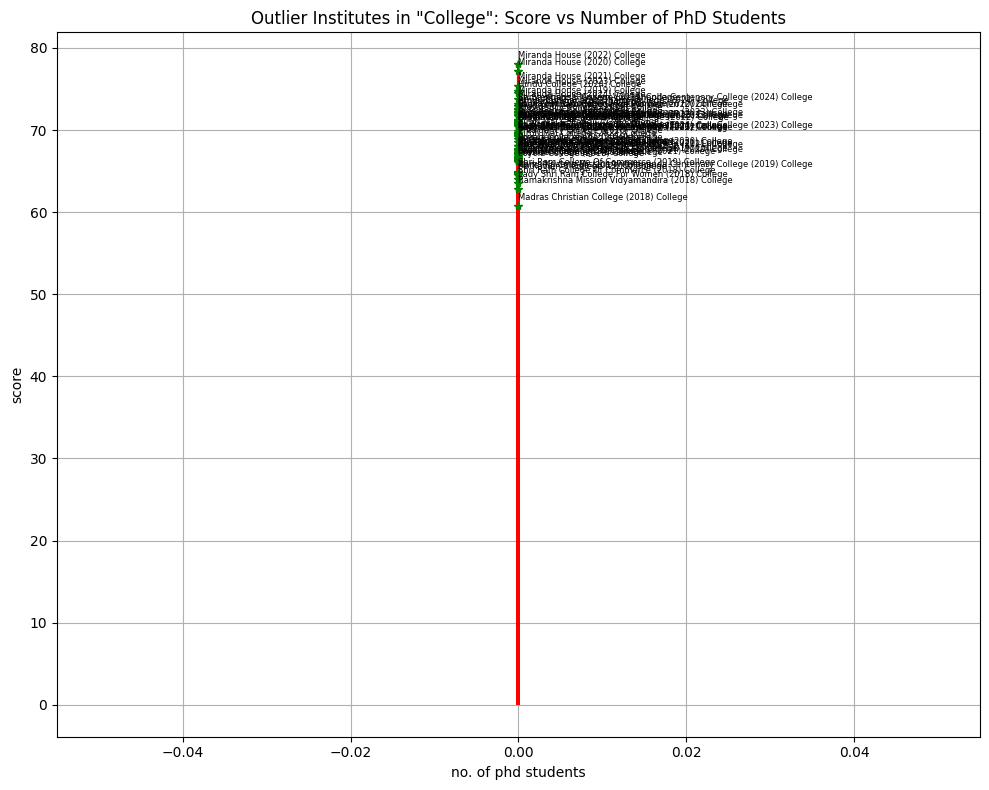

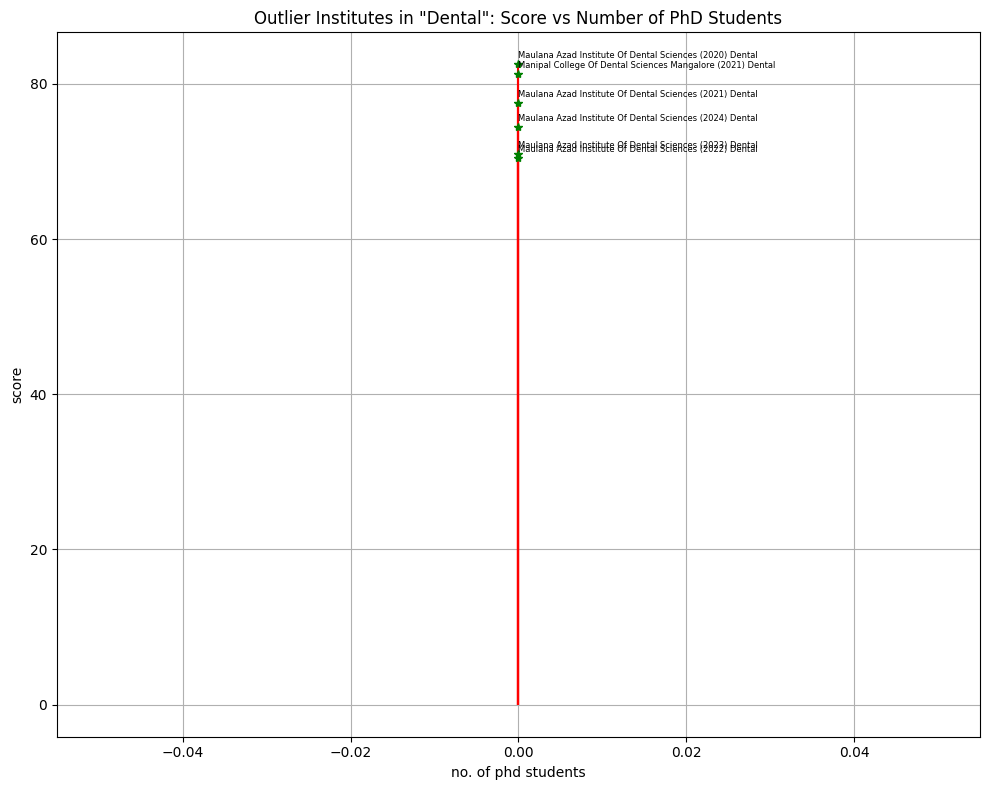

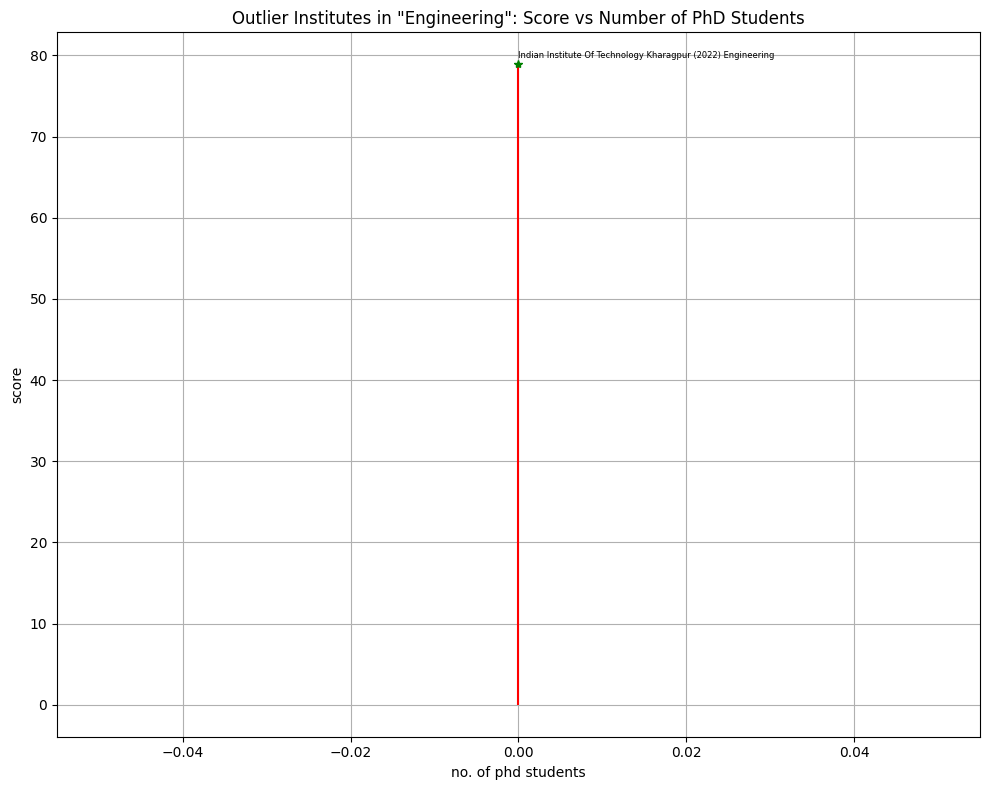

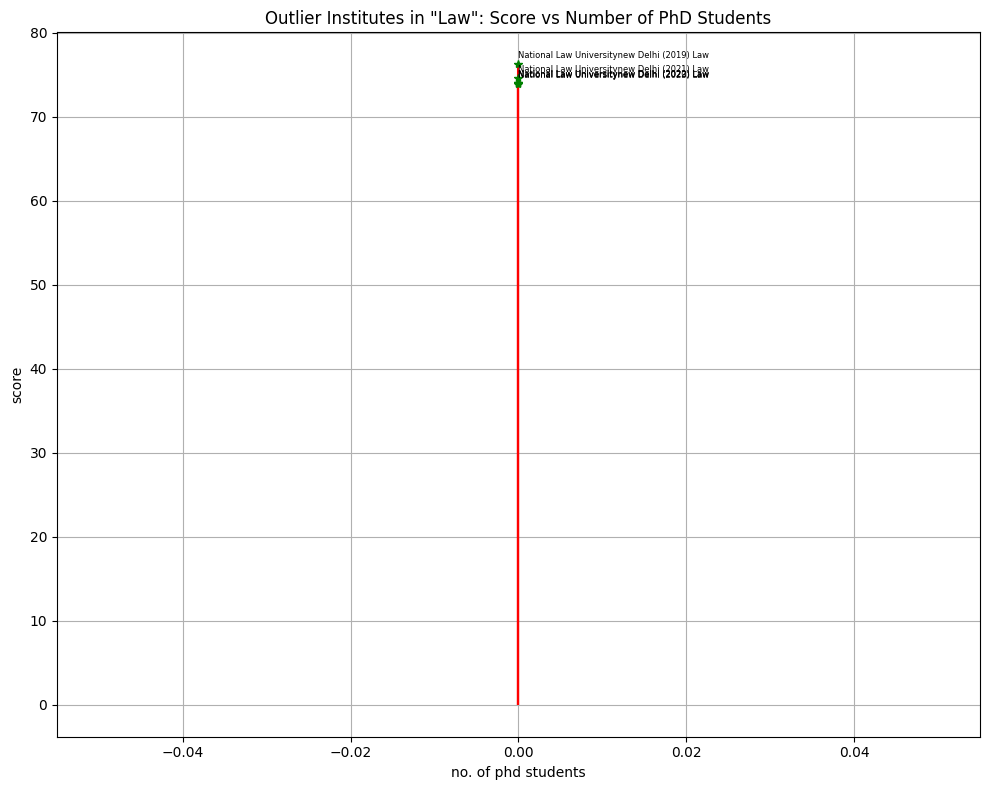

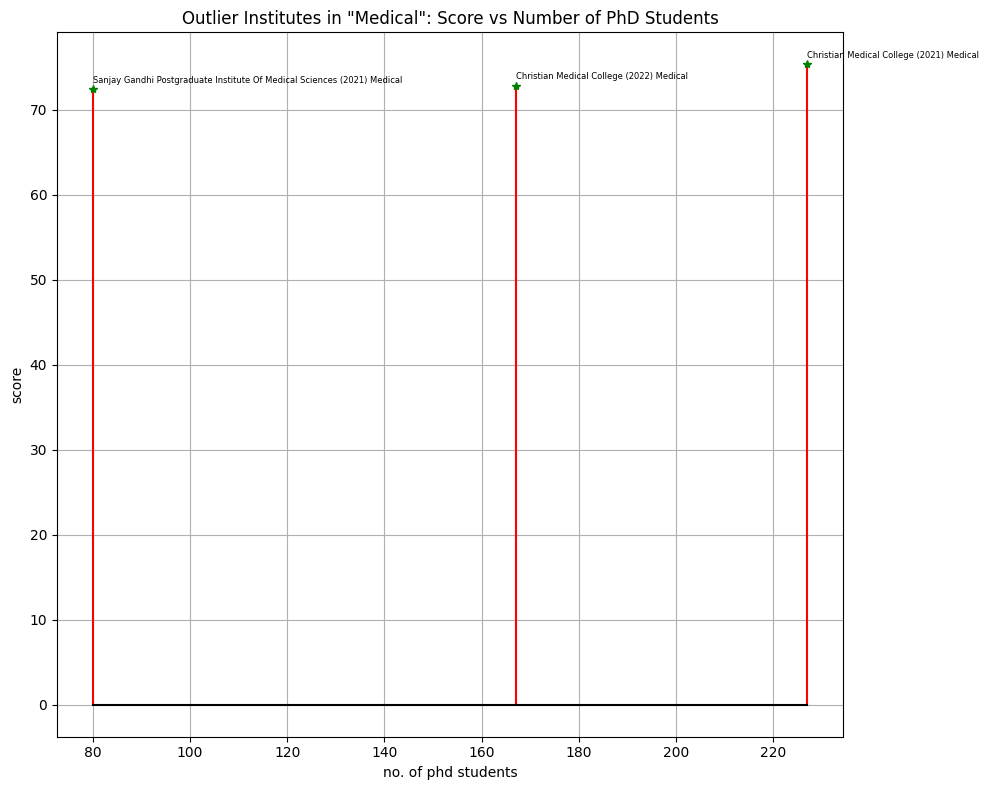

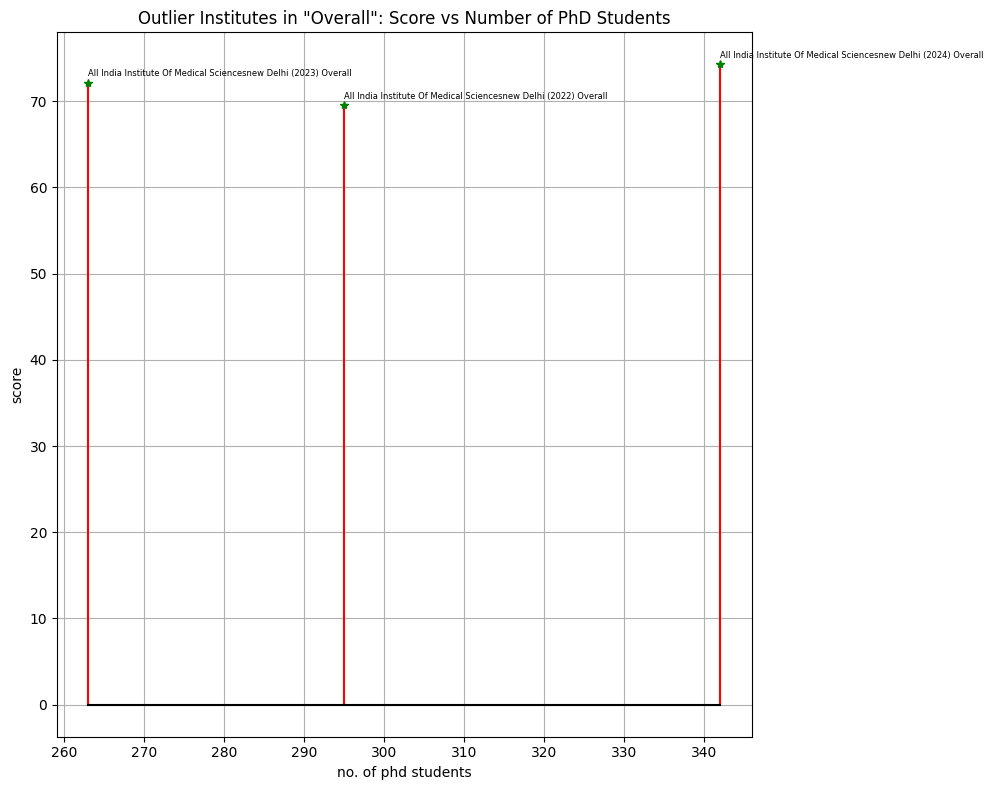

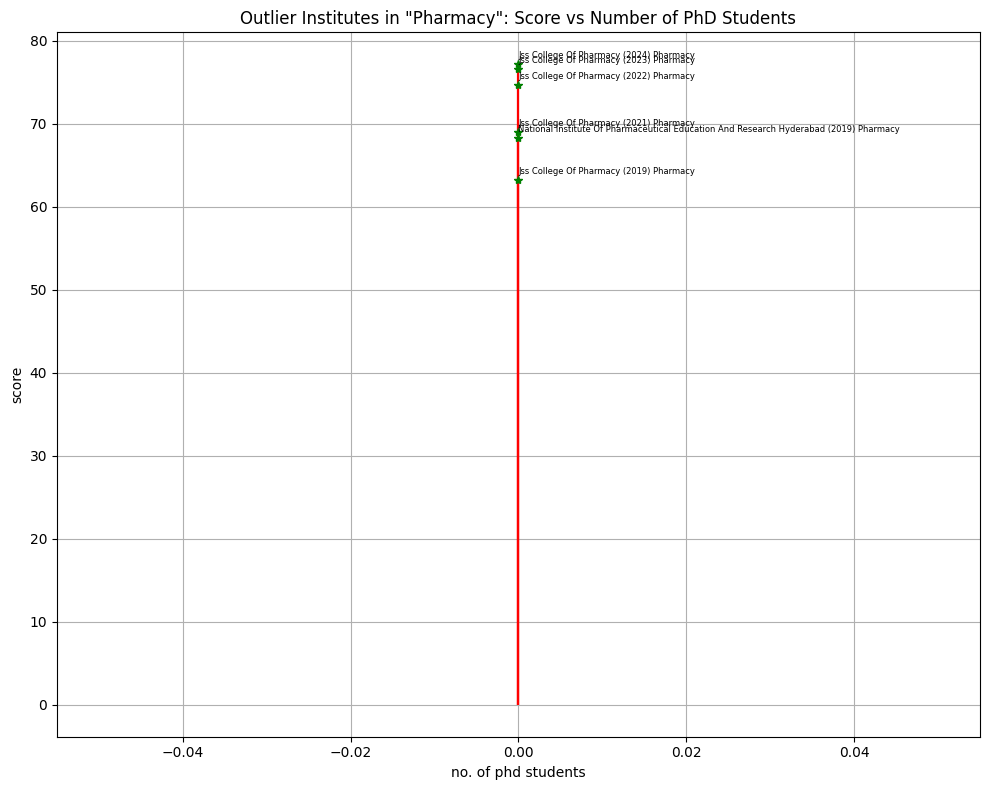

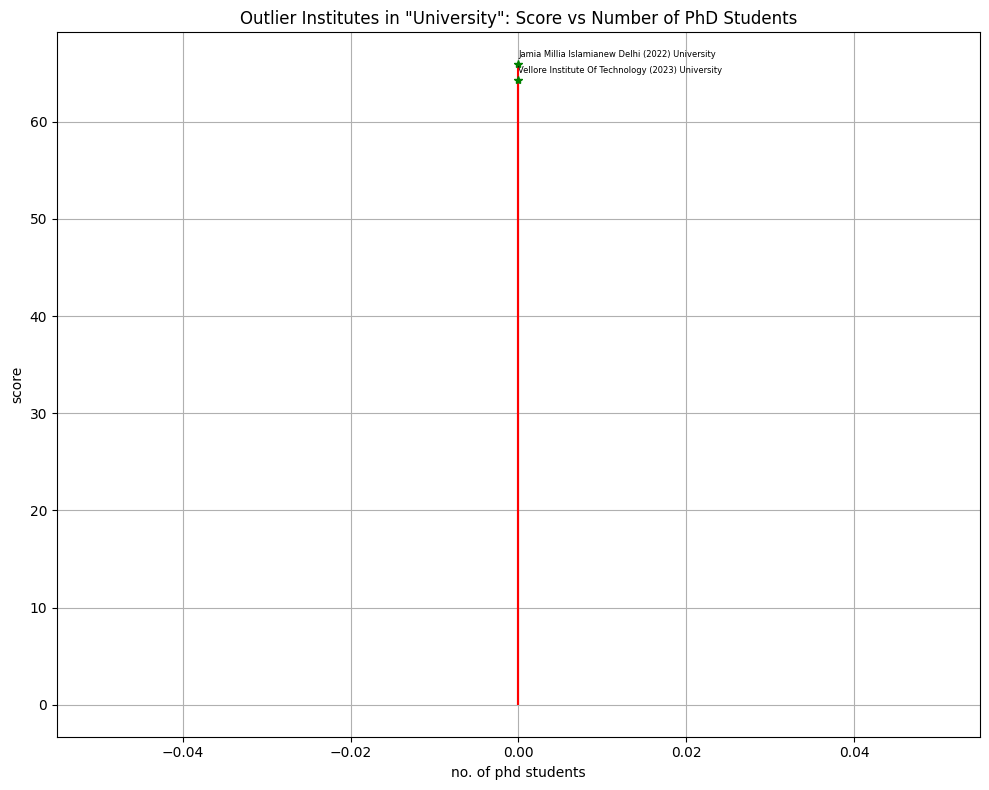

In [ ]:
categories = outlier_df['ranking_category'].unique()

for category in categories:
 req_df=outlier_df[outlier_df['ranking_category']==category]
 plt.figure(figsize= (10,8))
 x = req_df['no. of phd students']
 y = req_df['score']
 plt.stem(x,y ,linefmt='r-', markerfmt='g*', basefmt='k-')
 plt.xlabel('no. of phd students')
 plt.ylabel('score')
 plt.grid()
 plt.title(f'Outlier Institutes in "{category}": Score vs Number of PhD Students')
 for xi, yi, label, year,ranking_category in zip(x, y, req_df['institute_name'] ,req_df['ranking_year'], req_df['ranking_category']):
    plt.text(xi, yi + 0.5, f"{label} ({year}) {ranking_category}", ha='left', va='bottom', fontsize=6, rotation=0)

 plt.tight_layout()
 plt.show()